<a href="https://colab.research.google.com/github/jahidhasan299/jahidhasan299-Deep-Learning-With-7-Real-Projects/blob/main/Bernoulli_Restricted_Boltzman_Machine_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Will be used BernoulliRBM model to learn data representation is an unsupervised manner

# Import important library and dataset

In [15]:
from sklearn.neural_network import BernoulliRBM
rmb = BernoulliRBM()

In [16]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [17]:
img_size = x_train.shape[1]
original_dim = img_size * img_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
rmb = BernoulliRBM(verbose=True)
rmb.n_components= 100
rmb.fit(x_train)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -101.36, time = 12.69s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -98.24, time = 12.67s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -102.68, time = 12.57s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -99.78, time = 13.47s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -99.68, time = 12.68s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -97.70, time = 12.72s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -98.63, time = 12.66s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -98.79, time = 12.65s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -99.97, time = 12.74s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -100.26, time = 12.74s


BernoulliRBM(n_components=100, verbose=True)

In [18]:
r = rmb.transform(x_test)

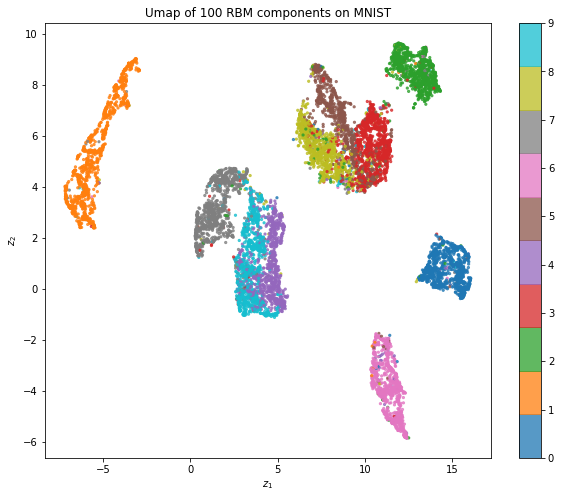

In [19]:
import matplotlib.pyplot as plt
import umap
y_ = list(map(int, y_test))
x_ = rmb.transform(x_test)
x_ = umap.UMAP().fit_transform(x_)
plt.figure(figsize = (10, 8))
plt.title("Umap of 100 RBM components on MNIST")
plt.scatter(x_[:, 0], x_[:, 1], s=5.0, c=y_, alpha=0.75, cmap="tab10")
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.colorbar()

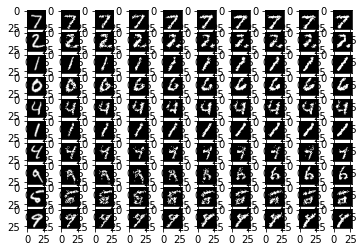

In [20]:
# The v variable will be a 784 * 100 matrix describing the learned weights
v = rmb.components_
plt.figure()
cnt = 1
for i in range(10):
  x = x_test[i]
  for j in range(10):
    plt.subplot(10, 10, cnt)
    plt.imshow(x.reshape((28,28)), cmap='gray')
    x = rmb.gibbs(x)
    cnt += 1
plt.show()
